## DSS 615 - Summer 2021 Assignments
## Assignment- 8B
## Sentiment Analysis
Modified: 6/1/2021

**Remember to add your last name to the file name.** 


Student: **YOURNAMEHERE**

# RUBRIC FOR 8B
Total possible 10 points

* 0 pt - must have - Repeat the analysis from 8A for the original 8A data source **AND** a second similar data source.
* 1 pt - must have - Create a combined dataframe that has separate columns for each source. You can choose to add columns to the 8A data frame for the new data or add rows. If adding rows, be sure to have a column that will allow to you differentiate between the two data sources.
* 4 pt - Create a multi-plot scatter diagram that displays polarity vs subjectivity for the two sources. Be sure they are different colors and a legend is shown.
* 3 pt - Produce some basic statistics for the two sources including overall sentence count, overall sentiment for each source, basic descriptive (e.g. describe) stats for each source, and the correlation between polarity and subjectivity for each source.
* 2 pt - Write a few sentences of key observations that you made regarding the analysis. Include additional analysis you would suggest doing based on the initial results.

Deductions for:
* Crashing code
* Logic errors producing incorrect results
* Lack of attempt for some or all components.

### Objectives:
* Retrieve text data from an article, speech, story, debate or some other web-based source.
* Clean the data then perform sentiment analysis.


### Requirements:
* Direct link to web-site to retrieve data though ok to turn text into a locally stored file.
* Locally stored files will be saved and loaded from same folder as the notebook so professor can run your code.
* Text will not include substantial amounts of leftover HTML code. (No HTML is preferred!)
* Dropping of some lines of text should be performed if the web-site delivers text that should not be included in the sentiment analysis. For example, if the text is a commencment speech, the introductory paragraph would likely be dropped so only the keynote speech is analyzed.
* Use any methods you like to process the data and perform the sentiment analysis. You do not need to use the examples from the text book or the live class.

### Special Note:
* Assignment 8B will perform a similar analysis on two opposite views of a topic. Think ahead. Choose a topic here that will allow you to reuse this code and text on the next assignment.

Potential examples: 
* Two essays on different views on climate change.
* Two public domain e-books or essays that represent different historical views on racial equality or women's rights.
* A debate that includes two individuals debating on several topics. (This assignment would show results for just one individual. Assignment 8B would have both individuals.)
* Similar venue speeches from two individuals with different ideologies, for example: two commencment speeches from different US presidents, two acceptance speeches from political party conventions, two, two newspaper opinion pieces on similar topics, etc.)
* A speech that led to a successful outcome (e.g. JFK - "We choose to go to the moon.") and on speech that fell flat and didn't unite people to action. 

### Reminder: 
* Assignment 8A will only analyze one of the two. Assignment 8B will recreate 8A for the first speech/article/book and add and compare the second speech/article.

In [71]:
# Data Source 1: All working code from previous assignment

'''
Presidential Nomination
Acceptance Speeches and Messages:
JOSEPH R. BIDEN
DONALD J. TRUMP
'''
#JOSEPH R. BIDEN Presidential Nomination Acceptance Speech
from bs4 import BeautifulSoup
import requests
import pandas as pd
from textblob import TextBlob

# Load text from web-page, save to local file
url = 'https://www.presidency.ucsb.edu/documents/address-accepting-the-democratic-presidential-nomination-wilmington-delaware'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

f = open("speech8A.txt", "w")
  
for p in soup.find('div', {'class': 'field-docs-content'}):
    f.writelines(p)
f.close()

speech = soup.find('div', {'class': 'field-docs-content'}).get_text()

# Load from saved file, review it, 
# drop lines as needed, perform necessary processing.
file = "speech8A.txt"

with open(file,'r') as f:
    contents = f.readlines()

for i in range(len(contents)):
    contents[i] = contents[i].strip('\n')
    contents[i] = contents[i].split('.')

contents = sum(contents , [])

contents = [sentence for sentence in contents if sentence != '']

# Perform sentiment analysis
contents_polarity = []
contents_subjectivity = []
for i in range(len(contents)):
    contents_polarity.append(TextBlob(contents[i]).polarity)
    contents_subjectivity.append(TextBlob(contents[i]).subjectivity)

# Save sentiment data to dataframe
data_tuples = list(zip(contents,contents_polarity,contents_subjectivity))
df = pd.DataFrame(data_tuples, columns=['sentence','polarity','subjectivity'])

# Output key sentiment analysis results including:
#   Overall sentiment analysis scores for the document
speech_sentiment = TextBlob(speech).sentiment
print('Overall sentiment analysis scores for the document')
print('Speech polarity is: ' + str(round(speech_sentiment.polarity,3)))
print('Speech subjectivity is: ' + str(round(speech_sentiment.subjectivity,3)))

#   Correlation of polarity and subjectivity scores across sentences
print('\nCorrelation of polarity and subjectivity scores across sentences\n'+str(df.corr()))

# Print out 20 sentences and their scores including:
#    5 most negative sentences including polarity and subjectivity
df_5neg = df.sort_values(['polarity'])
df_5neg = df_5neg[:5]
print('\n\n5 most negative sentences including polarity and subjectivity\n'+'='*75)
for index, row in df_5neg.iterrows():
    print('polarity: ', row['polarity'],
          '\nsubjectivity: ', row['subjectivity'], 
          '\nsentence: \n',"'",row['sentence'],"'",'\n'+'-'*50)

#    5 most positive sentences including polarity and subjectivity
df_5pos = df.sort_values(['polarity'], ascending=False)
df_5pos = df_5pos[:5]
print('\n\n5 most positive sentences including polarity and subjectivity\n'+'='*75)
for index, row in df_5pos.iterrows():
    print('polarity: ', row['polarity'],
          '\nsubjectivity: ', row['subjectivity'], 
          '\nsentence: \n',"'",row['sentence'],"'",'\n'+'-'*50)    

#    5 most subjective sentences including polarity and subjectivity
df_5sub = df.sort_values(['subjectivity'], ascending=False)
df_5sub = df_5sub[:5]
print('\n\n5 most subjective sentences including polarity and subjectivity\n'+'='*75)
for index, row in df_5sub.iterrows():
    print('subjectivity: ', row['subjectivity'],
          '\npolarity: ', row['polarity'],           
          '\nsentence: \n',"'",row['sentence'],"'",'\n'+'-'*50) 

#    5 most objective sentences including polarity and subjectivity
df_5obj = df.sort_values(['subjectivity'])
df_5obj = df_5obj[:5]
print('\n\n5 most objective sentences including polarity and subjectivity\n'+'='*75)
for index, row in df_5obj.iterrows():
    print('subjectivity: ', row['subjectivity'],
          '\npolarity: ', row['polarity'],           
          '\nsentence: \n',"'",row['sentence'],"'",'\n'+'-'*50) 



Overall sentiment analysis scores for the document
Speech polarity is: 0.154
Speech subjectivity is: 0.496

Correlation of polarity and subjectivity scores across sentences
              polarity  subjectivity
polarity      1.000000      0.343112
subjectivity  0.343112      1.000000


5 most negative sentences including polarity and subjectivity
polarity:  -1.0 
subjectivity:  1.0 
sentence: 
 ' The worst pandemic in over 100 years ' 
--------------------------------------------------
polarity:  -0.8 
subjectivity:  0.95 
sentence: 
 ' Remember the violent clash that ensued between those spreading hate and those with the courage to stand against it? ' 
--------------------------------------------------
polarity:  -0.8 
subjectivity:  0.9 
sentence: 
 ' A president who takes no responsibility, refuses to lead, blames others, cozies up to dictators, and fans the flames of hate and division ' 
--------------------------------------------------
polarity:  -0.8 
subjectivity:  1.0 
sentence

In [68]:
# Data Source 2: Copy previous code and adjust for new URL.
# You made need to create new variable and object names 
# depending on your approach.

# Data Source 1: All working code from previous assignment

'''
Presidential Nomination
Acceptance Speeches and Messages:
JOSEPH R. BIDEN
DONALD J. TRUMP
'''
#DONALD J. TRUMP Presidential Nomination Acceptance Speech
from bs4 import BeautifulSoup
import requests
import pandas as pd
from textblob import TextBlob

# Load text from web-page, save to local file
url_b = 'https://www.presidency.ucsb.edu/documents/address-accepting-the-republican-presidential-nomination-4'
page_b = requests.get(url_b)
soup_b = BeautifulSoup(page_b.content, 'html.parser')

speech_b = soup_b.find('div', {'class': 'field-docs-content'}).get_text()

f_b = open("speech8B.txt", "w")

for p in soup_b.find('div', {'class': 'field-docs-content'}):
    for data in soup_b(['i']):
        # Remove i tags
        data.decompose()
    f_b.writelines(p)

f_b.close()

# Load from saved file, review it, 
# drop lines as needed, perform necessary processing.
file = "speech8B.txt"

with open(file,'r') as f:
    contents_b = f.readlines()

for i in range(len(contents_b)):
    contents_b[i] = contents_b[i].strip('\n')
    contents_b[i] = contents_b[i].strip('[]')
    contents_b[i] = contents_b[i].strip(' ')
    contents_b[i] = contents_b[i].split('.')
    
contents_b = sum(contents_b , [])

contents_b = [sentence for sentence in contents_b if sentence != '']

# Perform sentiment analysis
contents_polarity_b = []
contents_subjectivity_b = []
for i in range(len(contents_b)):
    contents_polarity_b.append(TextBlob(contents_b[i]).polarity)
    contents_subjectivity_b.append(TextBlob(contents_b[i]).subjectivity)

# Save sentiment data to dataframe
data_tuples_b = list(zip(contents_b,contents_polarity_b,contents_subjectivity_b))
df_b = pd.DataFrame(data_tuples_b, columns=['sentence','polarity','subjectivity'])

# Output key sentiment analysis results including:
#   Overall sentiment analysis scores for the document
speech_sentiment_b = TextBlob(speech_b).sentiment
print('Overall sentiment analysis scores for the document')
print('Speech polarity is: ' + str(round(speech_sentiment_b.polarity,3)))
print('Speech subjectivity is: ' + str(round(speech_sentiment_b.subjectivity,3)))

#   Correlation of polarity and subjectivity scores across sentences
print('\nCorrelation of polarity and subjectivity scores across sentences\n'+str(df_b.corr()))

# Print out 20 sentences and their scores including:
#    5 most negative sentences including polarity and subjectivity
df_5neg_b = df_b.sort_values(['polarity'])
df_5neg_b = df_5neg_b[:5]
print('5 most negative sentences including polarity and subjectivity\n'+'='*75)
for index, row in df_5neg_b.iterrows():
    print('polarity: ', row['polarity'],
          '\nsubjectivity: ', row['subjectivity'], 
          '\nsentence: \n',"'",row['sentence'],"'",'\n'+'-'*50)

#    5 most positive sentences including polarity and subjectivity
df_5pos_b = df_b.sort_values(['polarity'], ascending=False)
df_5pos_b = df_5pos_b[:5]
print('\n\n5 most positive sentences including polarity and subjectivity\n'+'='*75)
for index, row in df_5pos_b.iterrows():
    print('polarity: ', row['polarity'],
          '\nsubjectivity: ', row['subjectivity'], 
          '\nsentence: \n',"'",row['sentence'],"'",'\n'+'-'*50)    

#    5 most subjective sentences including polarity and subjectivity
df_5sub_b = df_b.sort_values(['subjectivity'], ascending=False)
df_5sub_b = df_5sub_b[:5]
print('\n\n5 most subjective sentences including polarity and subjectivity\n'+'='*75)
for index, row in df_5sub_b.iterrows():
    print('subjectivity: ', row['subjectivity'],
          '\npolarity: ', row['polarity'],           
          '\nsentence: \n',"'",row['sentence'],"'",'\n'+'-'*50) 

#    5 most objective sentences including polarity and subjectivity
df_5obj_b = df_b.sort_values(['subjectivity'])
df_5obj_b = df_5obj_b[:5]
print('\n\n5 most objective sentences including polarity and subjectivity\n'+'='*75)
for index, row in df_5obj_b.iterrows():
    print('subjectivity: ', row['subjectivity'],
          '\npolarity: ', row['polarity'],           
          '\nsentence: \n',"'",row['sentence'],"'",'\n'+'-'*50) 


Overall sentiment analysis scores for the document
Speech polarity is: 0.158
Speech subjectivity is: 0.477

Correlation of polarity and subjectivity scores across sentences
              polarity  subjectivity
polarity      1.000000      0.357339
subjectivity  0.357339      1.000000
5 most negative sentences including polarity and subjectivity
polarity:  -1.0 
subjectivity:  1.0 
sentence: 
 '  I withdrew from the terrible one-sided Iran nuclear deal ' 
--------------------------------------------------
polarity:  -0.6999999999999998 
subjectivity:  0.6666666666666666 
sentence: 
 '  It's too bad we have to, but we have to wait for the call ' 
--------------------------------------------------
polarity:  -0.6666666666666666 
subjectivity:  1.0 
sentence: 
 ' For America, nothing is impossible ' 
--------------------------------------------------
polarity:  -0.6666666666666666 
subjectivity:  1.0 
sentence: 
 ' They said that it would be impossible to terminate and replace NAFTA ' 
----

In [80]:
# Combined Dataframe - Create a new dataframe (or add to the existing
# dataframe). Include all sentiment analysis related data for second
# data source

combined_df = df_b.join(df, lsuffix='_trump', rsuffix='_biden')
combined_df

,sentence_trump,polarity_trump,subjectivity_trump,sentence_biden,polarity_biden,subjectivity_biden
0,Thank you very much,0.260000,0.260000,Good evening,0.700000,0.600000
1,Thank you very much,0.260000,0.260000,"Ella Baker, a giant of the civil rights moveme...",0.133333,0.566667
2,Thank you,0.000000,0.000000,Give people light,0.400000,0.700000
3,Thank you very much,0.260000,0.260000,Those are words for our time,0.000000,0.000000
4,"Friends, delegates and distinguished guests, ...",0.390476,0.555952,The current president has cloaked America in d...,0.050000,0.333333
...,...,...,...,...,...,...
519,And we will make America greater than ever be...,0.500000,0.500000,NaN,NaN,NaN
520,"I'm very, very proud to be the nominee of the ...",1.000000,1.000000,NaN,NaN,NaN
521,I love you all,0.500000,0.600000,NaN,NaN,NaN
522,God bless you and God bless America,0.000000,0.000000,NaN,NaN,NaN


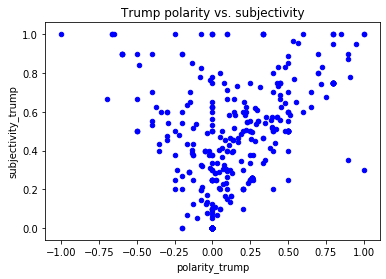

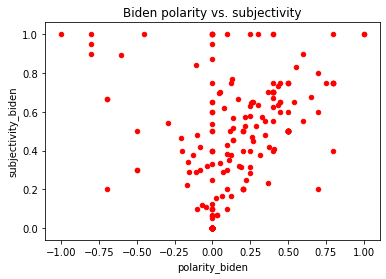

In [90]:
# Create scatter plot with two plots, one for each source
# Include a legend, additional annotation box with stats not required
# but would be a good challenge

import matplotlib.pyplot as plt

ax = combined_df.plot(kind="scatter", x="polarity_trump",y="subjectivity_trump", color="b", title="Trump polarity vs. subjectivity")
bx = combined_df.plot(kind="scatter", x="polarity_biden",y="subjectivity_biden", color="r", title="Biden polarity vs. subjectivity")

plt.show()



In [122]:
# Print out key statistics in objectives

print('Biden Presidential Nomination Acceptance Speech: statistics\n'+'='*75)
print('Sentence count: ' + str(df.count()[0]))
print('Speech polarity is: ' + str(round(speech_sentiment.polarity,3)))
print('Speech subjectivity is: ' + str(round(speech_sentiment.subjectivity,3)))
print('-'*50 +'\nBasic stats:\n' + str(df.describe()))
print('-'*50 +'\nCorrelation Matrix between polarity and subjectivity:\n' + str(df.corr()))


Biden Presidential Nomination Acceptance Speech: statistics
Sentence count: 305
Speech polarity is: 0.154
Speech subjectivity is: 0.496
--------------------------------------------------
Basic stats:
         polarity  subjectivity
count  305.000000    305.000000
mean     0.097179      0.289955
std      0.273179      0.325797
min     -1.000000      0.000000
25%      0.000000      0.000000
50%      0.000000      0.155556
75%      0.200000      0.541667
max      1.000000      1.000000
--------------------------------------------------
Correlation Matrix between polarity and subjectivity:
              polarity  subjectivity
polarity      1.000000      0.343112
subjectivity  0.343112      1.000000


In [123]:
# Print out key statistics in objectives

print('Trump Presidential Nomination Acceptance Speech: statistics\n'+'='*75)
print('Sentence count: ' + str(df_b.count()[0]))
print('Speech polarity is: ' + str(round(speech_sentiment_b.polarity,3)))
print('Speech subjectivity is: ' + str(round(speech_sentiment_b.subjectivity,3)))
print('-'*50 +'\nBasic stats:\n' + str(df_b.describe()))
print('-'*50 +'\nCorrelation Matrix between polarity and subjectivity:\n' + str(df_b.corr()))


Trump Presidential Nomination Acceptance Speech: statistics
Sentence count: 524
Speech polarity is: 0.158
Speech subjectivity is: 0.477
--------------------------------------------------
Basic stats:
         polarity  subjectivity
count  524.000000    524.000000
mean     0.102368      0.314207
std      0.285937      0.319992
min     -1.000000      0.000000
25%      0.000000      0.000000
50%      0.000000      0.260000
75%      0.250000      0.550000
max      1.000000      1.000000
--------------------------------------------------
Correlation Matrix between polarity and subjectivity:
              polarity  subjectivity
polarity      1.000000      0.357339
subjectivity  0.357339      1.000000


# My Analysis

### Presidential Nomination Acceptance Speeches: JOSEPH R. BIDEN vs. DONALD J. TRUMP

Although Trump's Presidential Nomination Acceptance Speech for the Republican party **contained more sentences overall**
* (Trump sentence count: 524 vs. Biden sentence count: 305)

the **polarity** of Trump's speech was only ***slightly more positive*** than Biden's Presidential Nomination Acceptance Speech for the Democratic party*
* (Trump polarity: 0.158 vs. Biden polarity: 0.154)

However, both are **low on the positive polarity scale around 0.15**
*with +1.000 being absolutely positve and -1.000 being absolutely negative.*


Trump's speech was also **slightly more objective** than Biden's speech
* (Trump sub: 0.477 vs. Biden sub: 0.496)
However, **both speeches are less than the midline of the subjectivity scale** which ranges from 0.000 to +1.000 
*with 0.000 being absolutely objective and +1.000 being absolutely subjective.*



### Suggested additional analysis based on the initial results:
based on my initial results of both speeches being very similar in polarity and subjectivity levels, as well as the correlation between the two, **I would like to analzye more Presidential Nomination Acceptance Speeches** across the years.



## Reminder:
*Before submitting:*
* Run all cells
* Save the file
* Be sure your last name is part of the file name